In [1]:
import pandas as pd
genre = pd.read_table('u.genre',sep='|')
#ratings = pd.read_table('u.data',sep=' ')
#users = pd.read_table('Movielens Project/Movielens Project/users.dat',sep='::',names=['user','gender','age','occupation','zip'])
#movies = pd.read_table('Movielens Project/Movielens Project/movies.dat',sep='::',names=['movie','title','genre'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ratings = pd.read_table('Movielens Project/Movielens Project/ratings.dat',sep='::',names=['user','movie','rating','time'],engine='python')
users = pd.read_table('Movielens Project/Movielens Project/users.dat',sep='::',names=['user','gender','age','occupation','zip'],engine='python')
movies = pd.read_table('Movielens Project/Movielens Project/movies.dat',sep='::',names=['movie','title','genre'],engine='python')

In [3]:
ratings.head()

,user,movie,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users.tail()

,user,gender,age,occupation,zip
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [5]:
movies.head()

,movie,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# 1. Number of movies, Number of ratings and Number users_who_rated

In [6]:
movies_ratings = pd.merge(movies,ratings,on='movie',how='inner')
movielens = pd.merge(movies_ratings, users)

In [7]:
movies_ratings.head()

,movie,title,genre,user,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


Number of movies are 3883

In [8]:
movies.shape

(3883, 3)

Number of movies that were rated are 3706

In [9]:
movies_ratings.groupby('title').size()

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

Number of ratings are 1000209

In [10]:
ratings.shape

(1000209, 4)

In [11]:
movies_ratings.rating.size

1000209

Number of users who rated are 6040

In [12]:
ratings.groupby('user').size()

user
1        53
2       129
3        51
4        21
5       198
6        71
7        31
8       139
9       106
10      401
11      137
12       23
13      108
14       25
15      201
16       35
17      211
18      305
19      255
20       24
21       22
22      297
23      304
24      136
25       85
26      400
27       70
28      107
29      108
30       43
       ... 
6011    197
6012     23
6013    124
6014    106
6015     57
6016    909
6017     33
6018    159
6019     89
6020     43
6021    132
6022     48
6023    147
6024     95
6025    271
6026     81
6027     36
6028     47
6029     31
6030    115
6031     51
6032    104
6033     60
6034     21
6035    280
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [13]:
users.tail()

,user,gender,age,occupation,zip
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


# 2. 5-point summary of the rating attribute

In [14]:
movies_ratings.head(50)

,movie,title,genre,user,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703


In [15]:
movies_ratings.rating.describe().apply(lambda x: format(x, 'f'))

count    1000209.000000
mean           3.581564
std            1.117102
min            1.000000
25%            3.000000
50%            4.000000
75%            4.000000
max            5.000000
Name: rating, dtype: object

Count of ratings:

In [16]:
movies_ratings.rating.count()

1000209

In [17]:
median_loc = (movies_ratings.rating.count()+1)/2
median_loc

500105.0

Median value:

In [18]:
movies_ratings.rating.iloc[500105]

4

In [19]:
print('Min rating : {0}'.format(movies_ratings.rating.min())) # minimum
print('Max rating : {0}'.format(movies_ratings.rating.max())) # maximum
print('Rating range : {0}'.format(movies_ratings.rating.max()  - movies_ratings.rating.min())) # range
print('25 percentile : {0}'.format(movies_ratings.rating.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(movies_ratings.rating.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(movies_ratings.rating.quantile(.75))) # 75 percentile
print('Variance rating : {0}'.format(movies_ratings.rating.var())) # variance
print('Standard deviation rating : {0}'.format(movies_ratings.rating.std())) # standard deviation

Min rating : 1
Max rating : 5
Rating range : 4
25 percentile : 3.0
50 percentile : 4.0
75 percentile : 4.0
Variance rating : 1.2479165329434154
Standard deviation rating : 1.1171018453764257


# 3. Rating distribution as a histogram

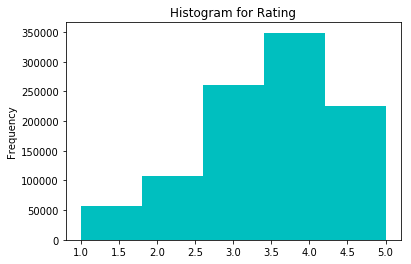

In [20]:
movies_ratings.rating.plot(kind='hist', title='Histogram for Rating', color='c', bins=5);

Kernel Density Estimation:

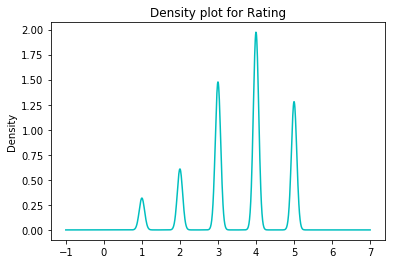

In [21]:
#Kernel Density Estimation
movies_ratings.rating.plot(kind='kde', title='Density plot for Rating', color='c');

Histogram for Rating vs Gender:

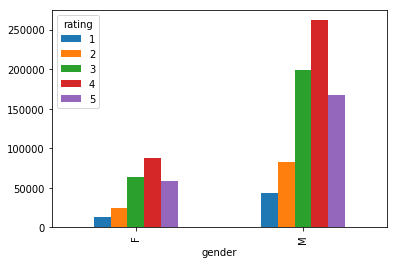

In [22]:
pd.crosstab(movielens.gender, movielens.rating).plot(kind='bar');

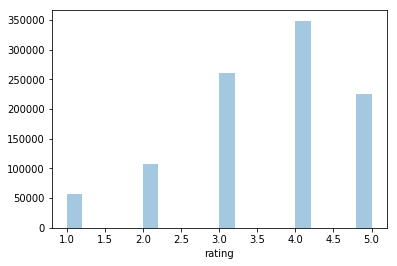

In [23]:
import seaborn as sns

# Create a distplot
sns.distplot(movielens['rating'],
             kde=False,
             bins=20)

# Display a plot
plt.show()

# 4. Genre distribution as a pie chart 

In [24]:
movielens.genre.unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [25]:
movies.head()

,movie,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
from pandas import Series
s = movies['genre'].str.split('|').apply(Series, 1).stack()

s.index = s.index.droplevel(-1) # to line up with df's index

s.name = 'genre' # needs a name to join

del movies['genre']

movies.join(s)

,movie,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [57]:
movies_genre = movies.join(s)
movies_genre.genre.unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [46]:
movies_genre.groupby('genre').count()

,movie,title
genre,,
Action,503,503
Adventure,283,283
Animation,105,105
Children's,251,251
Comedy,1200,1200
Crime,211,211
Documentary,127,127
Drama,1603,1603
Fantasy,68,68


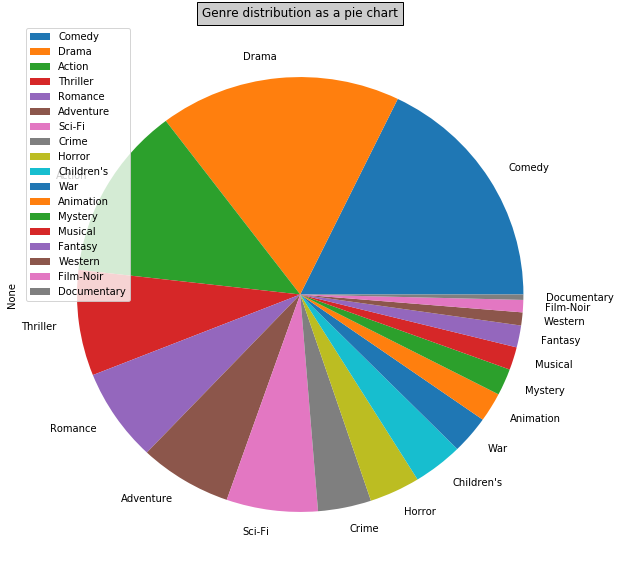

In [63]:
x = movielens.genre.str.split('|', 4, expand=True)

x.columns = ['a', 'b', 'c' , 'd' , 'e']
y = x.a.append(x.b , ignore_index=True)
z = y.append(x.c, ignore_index=True)
p = z.value_counts()
p.plot(kind='pie' , legend=True, figsize= (10,10))
plt.title("Genre distribution as a pie chart", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# 5. Top ranked movies consider only those movies which have received at-least 100 ratings

In [48]:
movie_stats = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [49]:
atleast_100 = movie_stats['rating']['size'] >= 100
atleast_100

title
$1,000,000 Duck (1971)                            False
'Night Mother (1986)                              False
'Til There Was You (1997)                         False
'burbs, The (1989)                                 True
...And Justice for All (1979)                      True
1-900 (1994)                                      False
10 Things I Hate About You (1999)                  True
101 Dalmatians (1961)                              True
101 Dalmatians (1996)                              True
12 Angry Men (1957)                                True
13th Warrior, The (1999)                           True
187 (1997)                                        False
2 Days in the Valley (1996)                        True
20 Dates (1998)                                    True
20,000 Leagues Under the Sea (1954)                True
200 Cigarettes (1999)                              True
2001: A Space Odyssey (1968)                       True
2010 (1984)                               

In [83]:
top25 = movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:25]
top25

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941
To Kill a Mockingbird (1962)                          928  4.425647
Double Indemnity (1944)                               551  4.415608
Casablanca (1942)                                    1669  4.412822
Sixth Sense, The (1999)                              2459  4.406263
Yojimbo (1961)                                        215  4.404651
Lawrence of Arabia (1962)                             831  4.401925
Maltese Falcon, The (1941)                           1043  4.395973
One Flew Over the Cuckoo's Nest (1975)               1725  4.390725
Citizen Kane (1941)                                  1116  4.388889
City Lights (1931)                                    271  4.387454

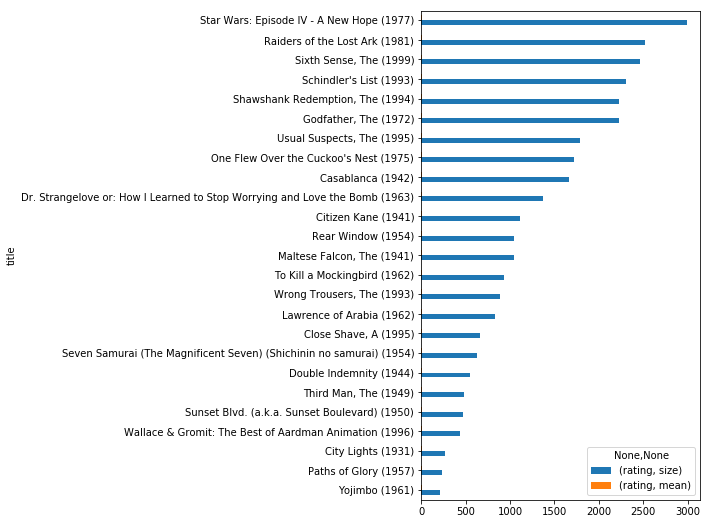

In [86]:
top25.sort_values([('rating', 'size')]).plot(kind='barh', figsize=[5, 9])